In [6]:
import numpy as np
import HindiChars as hc
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import matplotlib as mpl
import matplotlib.font_manager as mfm
import MatplotlibKeyMap as mk
import os
from wordcloud import WordCloud, STOPWORDS
import re
import networkx as nx 
import matplotlib
import threading
from IPython.display import display, clear_output
import multiprocessing as mp


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
def merge_CSVs(name, startNUmber, endNumber, filePath):
    df = pd.read_csv(filePath + str(startNUmber) + '/' + name   + '.csv')
    
    col1name = df.columns[0]
    col2name = df.columns[1]
    
    print(col1name)
    
    for i in range(startNUmber + 1, endNumber + 1):
        df_temp = pd.read_csv(filePath + str(i) + '/' + name + '.csv')
        
        for j in range(0, len(df_temp)):
            if df_temp[col1name][j] not in df[col1name].values:
                df = df.append(df_temp.iloc[j])
            else:
                df[col2name][df[col1name] == df_temp[col1name][j]] += df_temp[col2name][j]
    
    df['probability'] = df[col2name] / df[col2name].sum()
    
    # df = df.sort_values(by = col2name, ascending = False)
    df.to_csv("./results/" + name + '.csv', index = False)

In [43]:
results_list  = ['digrams', 'endings', 'halfLetters', 'matras', 'monograms', 'swars', 'triagrams', 'vyanjans']

In [46]:
for i in range(0, len(results_list)):
    merge_CSVs(results_list[i], 0, 19, './CSVs/')

digram
ending
halfLetter
matra
monogram
swar
triagram
vyanjan


Total number of words processed in total and number of unique words

In [14]:
df_words = pd.read_csv('./results/words.csv')

print("Total number of words processed: ", df_words[df_words.columns[1]].sum())
print("Number of unique words: ", len(df_words['word'].unique()))

Total number of words processed:  23312549
Number of unique words:  54771


In [36]:
def PlotBarGraph(df, name, path):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()
    plt.title(f'Probability of occurence of different {name}',fontsize=10)
    # print(arr)
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
        # print(f'{i} converted to {arr[i]}')
    # print(arr)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    ax.set_ylabel('Probability')

    sns.barplot(x=arr, y=df['probability'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)
    # print('Saving file to '+filename+'/'+name+'.png')
    plt.savefig(path+name+'.png')

In [37]:

def PlotBarGraphNextChar_filePath(df,name,path, char, nextCharType):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()

    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]

    if nextCharType=='vyanjan':
        plt.title(f'Next vyanjan after ', loc='left',fontsize=12)
    elif nextCharType=='matra':
        plt.title(f'Next matra after ', loc='left',fontsize=12)
    elif nextCharType=='swar':
        plt.title(f'Next swar after ', loc='left',fontsize=12)
        
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    
    plt.title(mk.Vyanjanmap[char],loc='center', fontproperties=prop,fontsize=20)
    
    sns.barplot(x=arr, y=df['probability'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)
    ax.set_ylabel('Probability')
    
    if not os.path.exists(path):
        os.makedirs(path)

    plt.savefig(path+name+'.png')

Reading results and loading it in dataframes

In [4]:
df_vyanjans = pd.read_csv('./results/vyanjans.csv')
df_matras = pd.read_csv('./results/matras.csv')
df_swars = pd.read_csv('./results/swars.csv')

Generating bar graphs for vyanjans, matras and swars

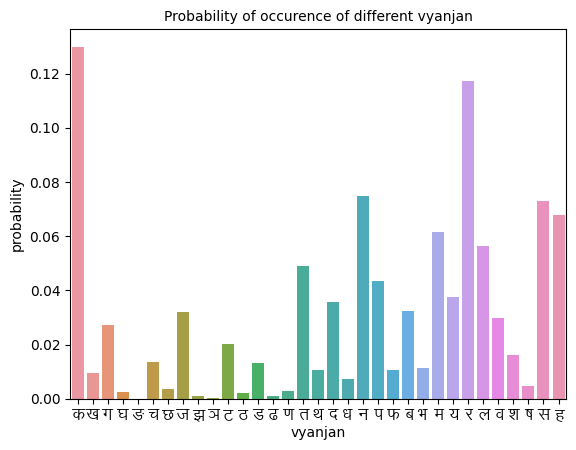

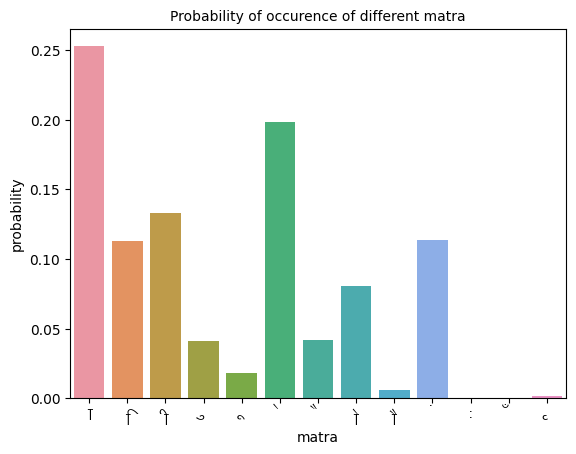

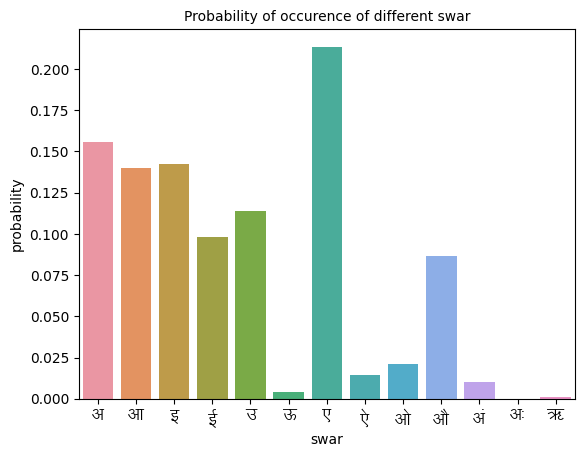

In [49]:
PlotBarGraph(df_vyanjans, 'vyanjan', './results/')
PlotBarGraph(df_matras, 'matra', './results/')
PlotBarGraph(df_swars, 'swar', './results/')

Grouping vyanjans, matras and swars based on their probability of occurence

In [41]:
def ScatterPlot(df, name,list, path):
    plt.figure()
    ax=plt.axes()
    arr = df[name].copy()
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
    plt.title(f'Dividing {name} into groups ',fontsize=10)
    plt.scatter(df[name], df['probability'],visible=False, s=10, c='r', marker="o", alpha=0.5)
    plt.xlabel(name)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    
    for i, txt in enumerate(arr):
        ax.annotate(txt, (df[name][i], df['probability'][i]),fontproperties=prop, fontsize=15)
    
    HorizontalLine = list
    
    for i in range(len(HorizontalLine)):
        plt.axhline(y=HorizontalLine[i], color='b', linestyle='-')
    
    
    
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15, visible=False)
    ax.set_ylabel('Probability')
    plt.ylabel('Probability')
    plt.savefig(path+ 'ScatterPlot'+name+'.png')

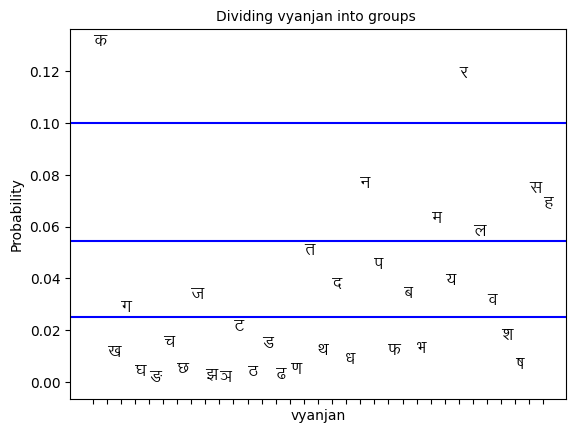

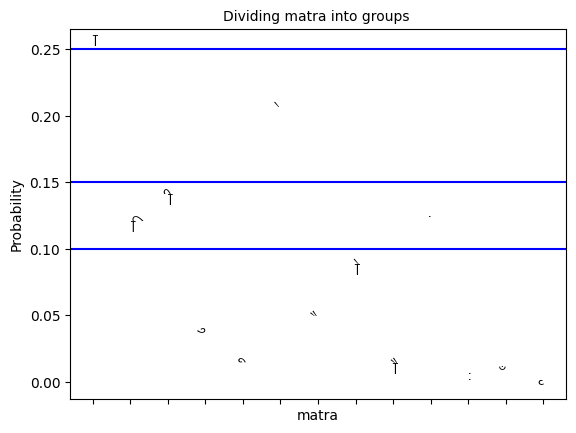

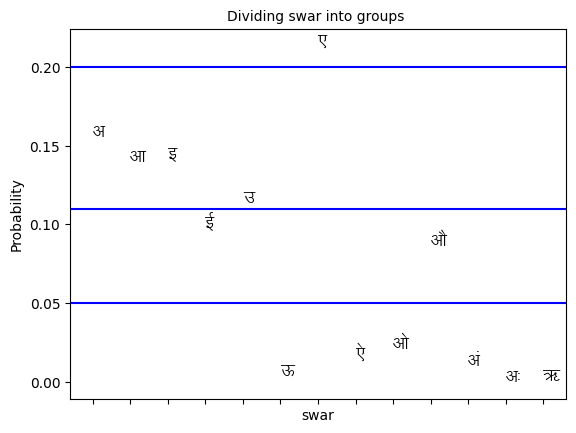

In [50]:
ScatterPlot(df_vyanjans, 'vyanjan',[0.10,0.0545,0.025], './results/')
ScatterPlot(df_matras, 'matra',[0.25,0.15,0.1], './results/')
ScatterPlot(df_swars, 'swar',[0.11,0.20,0.05], './results/')

In [53]:
def generateCSV(df, name, path):
    df['probability']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format

    df.to_csv(path + name, index=False)

In [73]:
# read one column from df_words
df_digrams_vyanjan = pd.DataFrame(columns=['digram','frequency'])
df_digrams_swar = pd.DataFrame(columns=['digram','frequency'])
df_digrams_matra = pd.DataFrame(columns=['digram','frequency'])

df_trigrams_vyanjan = pd.DataFrame(columns=['trigram','frequency'])
df_trigrams_swar = pd.DataFrame(columns=['trigram','frequency'])
df_trigrams_matra = pd.DataFrame(columns=['trigram','frequency'])

for word, freq, prob in df_words.values:   
    for i in range(0, len(word) - 1):
        if word[i] in hc.vyanjans:
            if len(word) > i + 2:
                if word[i:i+2] in df_digrams_vyanjan['digram'].values:
                    df_digrams_vyanjan['frequency'][df_digrams_vyanjan['digram'] == word[i:i+2]] += freq
                else:
                    df_digrams_vyanjan = df_digrams_vyanjan.append({'digram': word[i:i+2], 'frequency': freq}, ignore_index = True)
            if len(word) > i + 3:
                if word[i:i+3] in df_trigrams_vyanjan['trigram'].values:
                    df_trigrams_vyanjan['frequency'][df_trigrams_vyanjan['trigram'] == word[i:i+3]] += freq
                else:
                    df_trigrams_vyanjan = df_trigrams_vyanjan.append({'trigram': word[i:i+3], 'frequency': freq}, ignore_index = True)
        elif word[i] in hc.swars:
            if len(word) > i + 2:
                if word[i:i+2] in df_digrams_swar['digram'].values:
                    df_digrams_swar['frequency'][df_digrams_swar['digram'] == word[i:i+2]] += freq
                else:
                    df_digrams_swar = df_digrams_swar.append({'digram': word[i:i+2], 'frequency': freq}, ignore_index = True)
            if len(word) > i + 3:
                if word[i:i+3] in df_trigrams_swar['trigram'].values:
                    df_trigrams_swar['frequency'][df_trigrams_swar['trigram'] == word[i:i+3]] += freq
                else:
                    df_trigrams_swar = df_trigrams_swar.append({'trigram': word[i:i+3], 'frequency': freq}, ignore_index = True)
        elif word[i] in hc.matras:
            if len(word) > i + 2:
                if word[i:i+2] in df_digrams_matra['digram'].values:
                    df_digrams_matra['frequency'][df_digrams_matra['digram'] == word[i:i+2]] += freq
                else:
                    df_digrams_matra = df_digrams_matra.append({'digram': word[i:i+2], 'frequency': freq}, ignore_index = True)    
            if len(word) > i + 3:
                if word[i:i+3] in df_trigrams_matra['trigram'].values:
                    df_trigrams_matra['frequency'][df_trigrams_matra['trigram'] == word[i:i+3]] += freq
                else:
                    df_trigrams_matra = df_trigrams_matra.append({'trigram': word[i:i+3], 'frequency': freq}, ignore_index = True)

    
generateCSV(df_digrams_vyanjan, 'df_digrams_vyanjan.csv', './results/')
generateCSV(df_digrams_swar, 'df_digrams_swar.csv', './results/')
generateCSV(df_digrams_matra, 'df_digrams_matra.csv', './results/')
generateCSV(df_trigrams_vyanjan, 'df_trigrams_vyanjan.csv', './results/')
generateCSV(df_trigrams_swar, 'df_trigrams_swar.csv', './results/')
generateCSV(df_trigrams_matra, 'df_trigrams_matra.csv', './results/')


Top 5 digrams starting with a vyanjan

In [79]:
print(df_digrams_vyanjan.sort_values(by = 'frequency', ascending = False).head(5).values[:,0])

['मे' 'है' 'र्' 'का' 'रा']


Top 5 digrams starting with a swar

In [80]:
print(df_digrams_swar.sort_values(by = 'frequency', ascending = False).head(5).values[:,0])

['उन' 'इस' 'अप' 'उस' 'आर']


Top 5 digrams starting with a matra

In [82]:
print(df_digrams_matra.sort_values(by = 'frequency', ascending = False).head(5).values[:,0])

['ार' 'िय' 'ान' 'िल' 'ैं']


Top 5 trigrams starting with a vyanjan

In [83]:
print(df_trigrams_vyanjan.sort_values(by = 'frequency', ascending = False).head(5).values[:,0])

['प्र' 'हैं' 'नही' 'किय' 'त्र']


Top 5 trigrams starting with a swar

In [84]:
print(df_trigrams_swar.sort_values(by = 'frequency', ascending = False).head(5).values[:,0])

['अपन' 'उन्' 'उनक' 'इसक' 'उसक']


Top 5 trigrams starting with a matra

In [85]:
print(df_trigrams_matra.sort_values(by = 'frequency', ascending = False).head(5).values[:,0])

['ार्' 'िल्' 'िया' 'ुलि' 'ियो']


Top 20 words

In [91]:
df_top20_words = df_words.sort_values(by = 'frequency', ascending = False).head(20)
print(df_top20_words.values[:,0])

['के' 'में' 'की' 'को' 'ने' 'है.' 'से' 'और' 'का' 'पर' 'कि' 'भी' 'है' 'हैं.'
 'इस' 'एक' 'कर' 'नहीं' 'लिए' 'ही']


['के', 'में', 'की', 'को', 'ने', 'है.', 'से', 'और', 'का', 'पर', 'कि', 'भी', 'है', 'हैं.', 'इस', 'एक', 'कर', 'नहीं', 'लिए', 'ही']


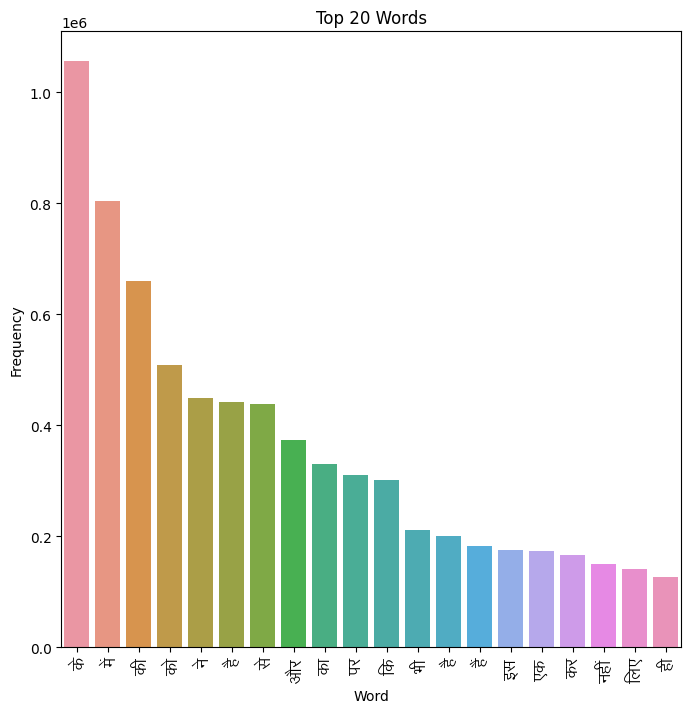

In [89]:
plt.figure(figsize=(8,8))
ax=plt.axes()

sns.barplot(x='word', y='frequency', data=df_top20_words)
plt.title('Top 20 Words')

plt.xlabel('Word')
plt.ylabel('Frequency')

wordsList = df_top20_words['word'].tolist()

xLabelsList = []

for word in wordsList:
    mappedWord = ""
    for letter in word:
        if letter in mk.Vyanjanmap:
            mappedWord += mk.Vyanjanmap[letter]
        elif letter in mk.SwarMap:
            mappedWord += mk.SwarMap[letter]
        elif letter in mk.MatraMap:
            if letter=='ि':
                last = mappedWord[-1]
                mappedWord = mappedWord[:-1] + mk.MatraMap[letter]+last
            else:
                mappedWord += mk.MatraMap[letter]
    # print(f'Actual letter is {word} and mapped letter is {mappedWord}')
    xLabelsList.append(mappedWord)

font_path = "KrutiDev-010.TTF"
prop = mfm.FontProperties(fname=font_path)
ax.set_xticklabels(xLabelsList, fontproperties=prop, fontsize=15,rotation=90)
plt.savefig(f'./results/top20_words.png')

plt.show()


Zipfs law

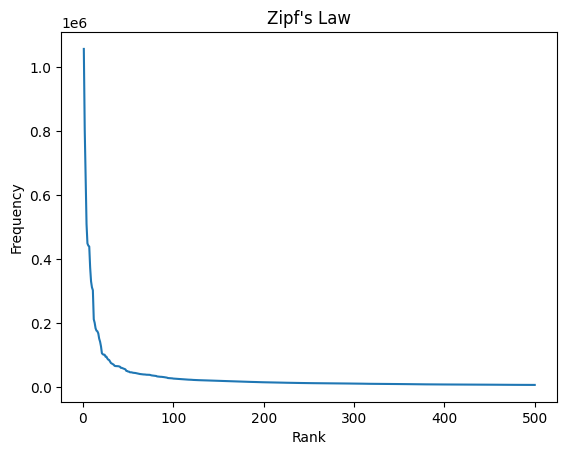

In [96]:
df_freq_words = df_words.head(500)

rank = np.array(range(1,len(df_freq_words)+1))

plt.figure()
plt.plot(rank, df_freq_words['frequency'])
plt.title('Zipf\'s Law')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.savefig(f'./results/Zipf.png')
plt.show()

In [2]:
df_words = pd.read_csv('./results/words.csv')

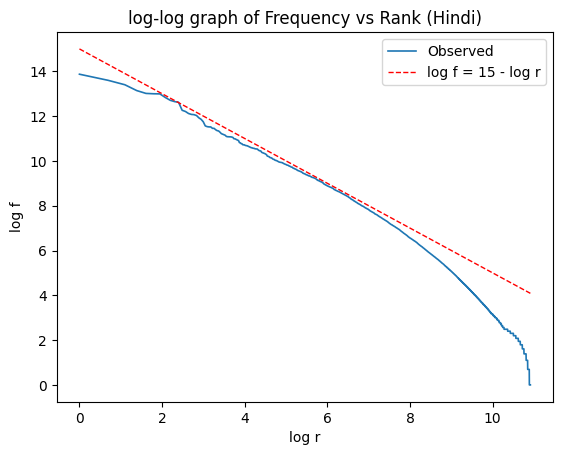

In [3]:
rank = np.array(range(1,len(df_words)+1))
# plot log-log graph of frequency vs rank
plt.figure()
ax=plt.axes()
xlog = np.log(rank)
ylog = np.log(df_words['frequency'])

plt.title('log-log graph of Frequency vs Rank (Hindi)')

plt.xlabel('log r')
plt.ylabel('log f')
plt.plot(xlog, ylog,  linestyle='-', linewidth=1.2, label='Observed')
plt.plot(xlog, 15-xlog, color='red', linestyle='--', linewidth=1, label='log f = 15 - log r')
plt.legend()
plt.savefig(f'./results/frequency_vs_rank.png')

plt.show()